In [1]:
import pandas as pd
df = pd.read_csv('./dataset/패션아이템/morpheme-result_MeCab.csv',
                 names=['TEXT'])
df

,TEXT
0,나이키 배색 반집 업 후 리스 봉봉 빈티지 품명 나이키 배색 반집 업 후 리스 가격...
1,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2,DAY 남미 배낭 여행 볼리비아 라파 데스 로드 킬리 킬리 야경 라파 시간 반 이동...
3,Made U 스윗 서브 후 리스 반집 업 후드 글 양털 후드 티 털 상품명 Made...
4,choiroom 터틀 골지 원피스 니트 세트 뒷면 룸 베스트 상품 무배 반 폴라 기...
...,...
95864,핫 딜 블랙 야크 여성 반집 업 티셔츠 주황 주문 링크 https cafe nave...
95865,핫 딜 이디 엑스 JDX 여성 이중 리반 집 업 티셔츠 네이비 주문 링크 https...
95866,핫 딜 이디 엑스 JDX 여성 이중 리반 집 업 티셔츠 블랙 할인 주문 링크 htt...
95867,남성 폴로 면반 집 업 니트 레드 l xl 기준 여유


In [2]:
df['TEXT']

0        나이키 배색 반집 업 후 리스 봉봉 빈티지 품명 나이키 배색 반집 업 후 리스 가격...
1        커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2        DAY 남미 배낭 여행 볼리비아 라파 데스 로드 킬리 킬리 야경 라파 시간 반 이동...
3        Made U 스윗 서브 후 리스 반집 업 후드 글 양털 후드 티 털 상품명 Made...
4        choiroom 터틀 골지 원피스 니트 세트 뒷면 룸 베스트 상품 무배 반 폴라 기...
                               ...                        
95864    핫 딜 블랙 야크 여성 반집 업 티셔츠 주황 주문 링크 https cafe nave...
95865    핫 딜 이디 엑스 JDX 여성 이중 리반 집 업 티셔츠 네이비 주문 링크 https...
95866    핫 딜 이디 엑스 JDX 여성 이중 리반 집 업 티셔츠 블랙 할인 주문 링크 htt...
95867                       남성 폴로 면반 집 업 니트 레드 l xl 기준 여유 
95868    쇼지 첼시 핫 딜 디스커버리 여성 반집 업 기모 하이넥 긴팔 티 정가 블랙 기모 링...
Name: TEXT, Length: 95869, dtype: object

In [3]:
texts = df['TEXT'].values.tolist()
print(texts[0])

나이키 배색 반집 업 후 리스 봉봉 빈티지 품명 나이키 배색 반집 업 후 리스 가격 사이즈 길 센치 어깨 단면 센치 가슴 단면 센치 제품 설명 컨디션 세탁 완료 


In [4]:
from krwordrank.hangle import normalize

texts = [normalize(str(text), english=True, number=True) for text in texts]

In [5]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count=5,  # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length=10,  # 단어의 최대 길이
    verbose=True
)

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 29389
done = 10


In [12]:
for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

     아노락:	252.1182
      반집:	132.6558
      사이:	102.0505
      판매:	100.7516
     com:	94.9909
      제품:	90.3999
      가격:	80.8976
      상품:	74.5362
      kr:	71.9998
      자켓:	65.5757
      후드:	62.7864
      거래:	60.9793
      하프:	60.4872
     티셔츠:	58.9509
     나이키:	57.5928
      남성:	53.9585
      장터:	51.6532
      번개:	46.9404
      니트:	43.4582
      여성:	42.0386
      블랙:	41.2318
    http:	37.8685
products:	34.0119
      폴로:	33.4256
      골프:	31.2694
      공구:	28.1871
      패딩:	27.5439
      기모:	27.4070
     바람막:	26.3056
     맨투맨:	24.3372


In [13]:
stopwords = {'com', 'kr', 'http', 'products'}
passwords = {word: score for word, score in sorted(
    keywords.items(), key=lambda x: -x[1])[:300] if not (word in stopwords)}

In [14]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(
    texts, min_count=5, max_length=10, beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts)  # with default arguments

scan vocabs ... 
num vocabs = 29389
done = 10


In [15]:
from wordcloud import WordCloud

# Set your font path
font_path = 'YOUR_FONT_DIR/truetype/nanum/NanumBarunGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path=font_path,
    width=800,
    height=800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

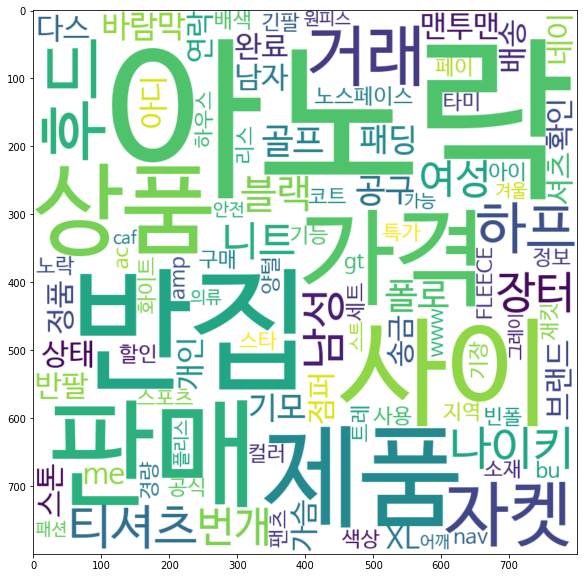

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [17]:
# fig.savefig('./result_img/10_MeCab-2-KRWordRank_[ZIPUP].png')